# Revise prediction

## define unity function

In [60]:
import pathlib
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

CACHE_DIR = pathlib.Path('../../result(new)/cache/')
FIG_DIR = pathlib.Path('../../result(new)/fig/')

def get_ori_predict(well_name):
    well_name_dir = CACHE_DIR.joinpath(well_name)
    if not well_name_dir.exists(): return None
    ori = pd.read_csv(well_name_dir.joinpath('data.csv'), parse_dates=['Date'], squeeze=True)
    predict = pd.read_csv(well_name_dir.joinpath('predict.csv'), parse_dates=['Date'], squeeze=True)
    return ori, predict

def get_fig(well_name):
    well_name_fig = FIG_DIR.joinpath(str(well_name) + '.png')
    p = plt.imread(well_name_fig)
    return p

In [54]:
import json
def is_json(json_str):
    try:
        json_object = json.loads(json_str)
    except ValueError as e:
        return False
    return True

def format_model(model_str):
    strs = model_str.split('\n')
    print('strs = ', strs)
    res_str = ''
    for s in strs:
        s = s.replace("\"{", "{")
        s = s.replace("}\"", "}")
        s = s.replace("\\", "")
        if is_json(s):
            res_str += json.dumps(json.loads(s), indent=2) + '\n'
        else:
            res_str += s + '\n'
    return res_str

In [7]:
from autots import AutoTS

In [70]:
def show(well_name):
    fig = plt.imshow(get_fig(well_name))
    plt.axis('off')
    plt.show()

## revise one by one

### 2643 Dexter Rd

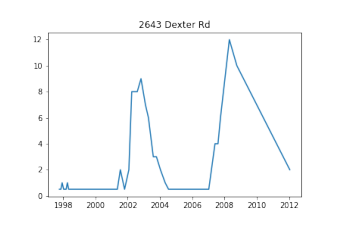

In [4]:
well_name = '2643 Dexter Rd'
# print(get_ori_predict(well_name))
fig = plt.imshow(get_fig(well_name))
plt.axis('off')
plt.show()

In [83]:
def revise(well_name):
    group = get_ori_predict(well_name)[0]
    pd.set_option('display.max_rows', 10)
    print(group)

    mod = AutoTS(forecast_length=5,
                 frequency='Y',
                 no_negatives=True,
                 verbose=-4)

    mod = mod.fit(group, date_col='Date', value_col='y', id_col=None)

    prediction = mod.predict()
    forecast = prediction.forecast

    group = get_ori_predict(well_name)[0]

    print(forecast)
    group.set_index('Date', inplace=True)

    fig, ax = plt.subplots()
    ax.plot(group,  label='a')
    ax.plot(forecast,  label='b')
    ax.set_title(well_name)
    plt.savefig('../../result(new)/revised/fig/'+well_name+'.png')

    cache_dir = pathlib.Path('../../result(new)/revised/cache/'+well_name)
    cache_dir.mkdir(parents=True, exist_ok=True)

    forecast.index.name = "Date"
    forecast.squeeze().to_csv(cache_dir.joinpath('predict.csv'))

    ft = open("../../result(new)/revised/mod/" + well_name + '.txt', "w")
    ft.write(format_model(str(mod)))
    ft.close()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Too many training validations for length of data provided, decreasing num_validations to 1
[LibLinear]         Date     y
0  1997-10-08   0.5
1  1997-11-11   0.5
2  1997-12-09   1.0
3  1998-01-13   0.5
4  1998-02-10   0.5
..        ...   ...
65 2007-08-08   4.0
66 2007-10-03   6.0
67 2008-04-21  12.0
68 2008-10-08  10.0
69 2012-01-19   2.0

[70 rows x 2 columns]
                             y
2013-12-31 00:00:00  29.210997
2014-12-31 00:00:00   2.210997
2015-12-31 00:00:00   2.700089
2016-12-31 00:00:00   2.217054
2017-12-31 00:00:00   2.210997
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"ebd7fdf5f308ef248a85389b9e694fe0": {"Model": "RollingRegression", "ModelParameters": "{\\"regression_model\\": {\\"model\\": \\"DecisionTree\\", \\"model_params\\": {\\"max_depth\\": 9, \\"min_samples_split\\": 0.05}}, \\"holiday\\": false, \\"mean_rolling_periods\\": 12, \\"macd_periods\\": 9

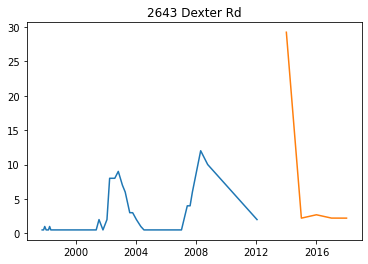

In [67]:
revise(well_name)

### 2700 Dexter Rd

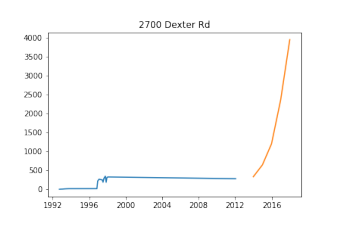

In [68]:
well_name = '2700 Dexter Rd'
# print(get_ori_predict(well_name))
fig = plt.imshow(get_fig(well_name))
plt.axis('off')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original
FillNA method not known, returning original
         Date      y
0  1992-09-24    5.0
1  1992-11-02    7.0
2  1993-02-01   10.0
3  1993-04-26   15.0
4  1993-07-19   18.0
5  1993-10-12   20.0
6  1996-11-05   21.0
7  1996-12-04  201.0
8  1996-12-05  220.0
9  1997-01-28  270.0
10 1997-06-11  252.0
11 1997-07-08  192.0
12 1997-08-12  290.0
13 1997-09-09  320.0
14 1997-10-07  350.0
15 1997-11-11  190.0
16 1997-12-09  310.0
17 1998-01-14  330.0
18 2012-01-23  284.0
                      y
2013-12-31   711.883680
2014-12-31  1372.530051
2015-12-31  2454.431931
2016-12-31  4428.124663
2017-12-31  7561.951071
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "BestN", "model_count": 3, "model_metric": "mixed_metric", "models": {"cbceea2ed70063dbbf1685af830da724": {"Model": "AverageValueNaive", "ModelParameters": "{\\"method\\": \\"Mean\\"}", "TransformationParameters": "{\\"fillna\\": \\"fake_date\\", \\"transforma

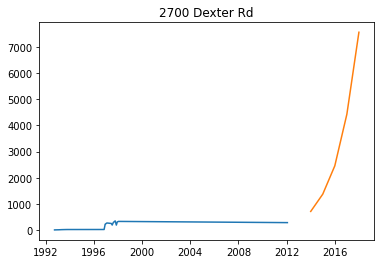

In [69]:
revise(well_name)

### 3245 Kingwood

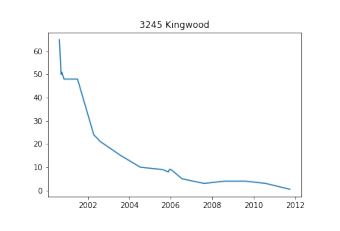

In [71]:
well_name = '3245 Kingwood'
show(well_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Too many training validations for length of data provided, decreasing num_validations to 0
         Date     y
0  2000-08-21  65.0
1  2000-09-20  50.0
2  2000-10-03  51.0
3  2000-11-09  48.0
4  2000-12-13  48.0
5  2001-07-06  48.0
6  2002-04-18  24.0
7  2002-08-14  21.0
8  2003-08-08  15.0
9  2004-07-16  10.0
10 2005-08-10   9.0
11 2005-11-21   8.0
12 2005-12-06   9.0
13 2005-12-23   9.0
14 2006-01-05   9.0
15 2006-07-20   5.0
16 2007-08-14   3.0
17 2008-07-29   4.0
18 2009-08-11   4.0
19 2010-08-03   3.0
20 2011-09-26   0.5
                            y
2012-12-31 00:00:00  0.000000
2013-12-31 00:00:00  0.000000
2014-12-31 00:00:00  0.000000
2015-12-31 00:00:00  0.101987
2016-12-31 00:00:00  0.066238
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"ddade2b1e589e25b31807c13ffb275b1": {"Model": "Ensemble", "ModelParameters": "{\\"model_name\\": \\"Dist\\", \\"model_count\\": 2, \\"m

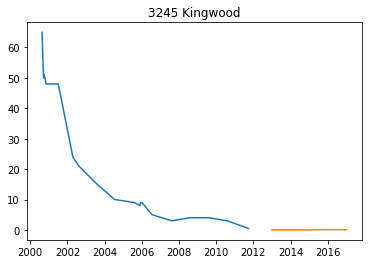

In [72]:
revise(well_name)

### DOLPH

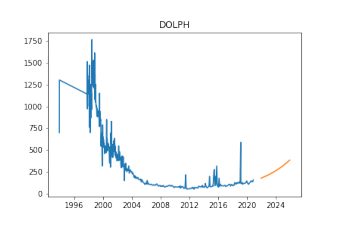

In [73]:
well_name = 'DOLPH'
show(well_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


          Date       y
0   1993-12-15   700.0
1   1993-12-16  1300.0
2   1997-10-21  1140.0
3   1997-10-24  1090.0
4   1997-10-31  1070.0
..         ...     ...
502 2020-09-03   150.0
503 2020-09-18   140.0
504 2020-10-06   140.0
505 2020-11-06   140.0
506 2020-12-03   160.0

[507 rows x 2 columns]
                             y
2021-12-31 00:00:00  93.549654
2022-12-31 00:00:00  93.549308
2023-12-31 00:00:00  93.548963
2024-12-31 00:00:00  93.548617
2025-12-31 00:00:00  93.548271
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"c3f39b7718474b2df57ff7c06524a55d": {"Model": "ETS", "ModelParameters": "{\\"damped_trend\\": false, \\"trend\\": null, \\"seasonal\\": null, \\"seasonal_periods\\": null}", "TransformationParameters": "{\\"fillna\\": \\"zero\\", \\"transformations\\": {\\"0\\": \\"IntermittentOccurrence\\", \\"1\\": \\"PowerTransformer\\", \\"2\\": \\"DifferencedTransformer

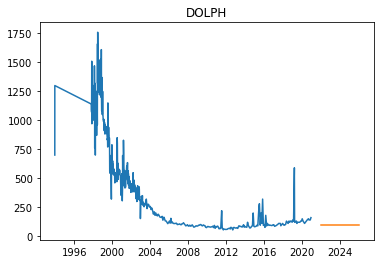

In [74]:
revise(well_name)

### HZ-S

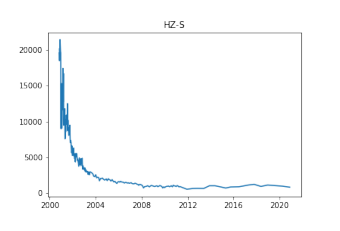

In [75]:
well_name = 'HZ-S'
show(well_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original
FillNA method not known, returning original
          Date        y
0   2000-11-06  19598.0
1   2000-11-10  18501.0
2   2000-11-13  20219.0
3   2000-11-20  19136.0
4   2000-11-27  21449.0
..         ...      ...
240 2017-10-16   1200.0
241 2018-05-23    900.0
242 2018-12-21   1100.0
243 2020-04-02    940.0
244 2020-11-23    800.0

[245 rows x 2 columns]
                              y
2021-12-31 00:00:00  819.036167
2022-12-31 00:00:00  777.850005
2023-12-31 00:00:00  738.734936
2024-12-31 00:00:00  701.586812
2025-12-31 00:00:00  666.306724
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"37a2232d656bd074a3b781dd6b7545db": {"Model": "ETS", "ModelParameters": "{\\"damped_trend\\": false, \\"trend\\": \\"multiplicative\\", \\"seasonal\\": null, \\"seasonal_periods\\": null}", "TransformationParameters": "{\\"fillna\\": \\"rolling_mean\\", 

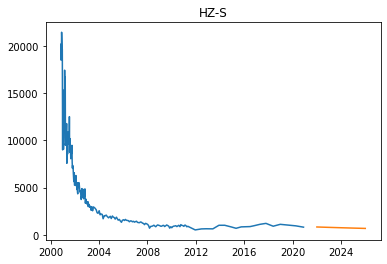

In [76]:
revise(well_name)

### IW-1

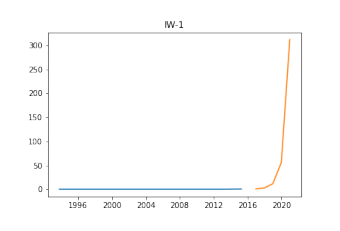

In [77]:
well_name = 'IW-1'
show(well_name)

In [80]:
revise(well_name)

        Date    y
0 1993-10-11  0.5
1 1993-10-12  0.5
2 2002-06-27  0.5
3 2013-05-06  0.5
4 2015-04-09  1.0
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=2')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=2')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=2')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=2')


KeyboardInterrupt: 

### IW-2

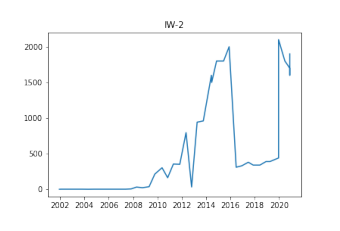

In [81]:
well_name = 'IW-2'
show(well_name)

         Date       y
0  2001-12-12     1.0
1  2002-02-04     2.0
2  2002-04-30     2.0
3  2002-11-07     2.0
4  2003-04-15     2.0
..        ...     ...
43 2020-06-24  1800.0
44 2020-11-18  1700.0
45 2020-11-18  1600.0
46 2020-11-18  1700.0
47 2020-11-18  1900.0

[48 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                          y
2021-12-31 00:00:00  2821.0
2022-12-31 00:00:00  4231.0
2023-12-31 00:00:00  5641.0
2024-12-31 00:00:00  7051.0
2025-12-31 00:00:00  8461.0
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"f119bb25c36b441da1ddaac6857042da": {"Model": "UnobservedComponents", "ModelParameters": "{\\"level\\": true, \\"trend\\": true, \\"cycle\\": false, \\"damped_cycle\\": false, \\"irregular\\": false, \\"stochastic_trend\\": true, \\"stochastic_level\\": true, \\"stochastic_cycle\\": false, \\"regression_type\\": null}", "TransformationParameters": "{\\"fillna\\": \\"median\\", \\"transformations\\": {\\"0\\": \\"MinMaxScaler\\", \\"1\\": \\"Slice\\", \\"2\\": \\"DifferencedTransformer\\", \\"3\\": \\"DifferencedTransformer\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {\\"method\\": 100}, \\"2\\": {}, \\"3\\": {}}}"}}, "series": {"y": "f119bb25c36b441da1ddaac

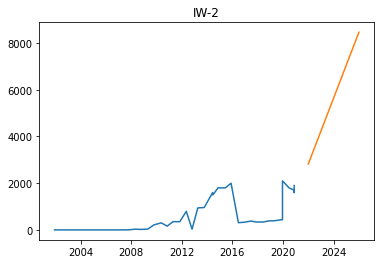

In [84]:
revise(well_name)

### LB-3

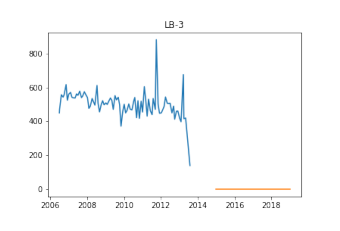

In [85]:
well_name = 'LB-3'
show(well_name)

         Date      y
0  2006-06-29  450.0
1  2006-07-03  472.0
2  2006-08-07  557.0
3  2006-09-11  543.0
4  2006-10-02  558.0
..        ...    ...
80 2013-02-04  398.0
81 2013-03-22  676.0
82 2013-04-01  416.0
83 2013-05-06  420.0
84 2013-07-31  140.0

[85 rows x 2 columns]
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
[LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear]Too many training validations for length of data provided, decreasing num_validations to 0
                         y
2014-12-31 00:00:00  470.0
2015-12-31 00:00:00    0.0
2016-12-31 00:00:00    0.0
2017-12-31 00:00:00    0.0
2018-12-31 00:00:00    0.0
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"29d4c6ee1d242d5c553919896c46651f": {"Model": "Ensemble", "ModelParameters": "{\\"model_name\\": \\"Dist\\", \\"model_count\\": 2, \\"model_metric\\": \\"smape\\", \\"models\\": {\\"5b533a4c22a7deeca64229323a6154d8\\": {\\"Model\\": \\"SeasonalNaive\\", \\"ModelParameters\\": \\"{\\\\\\"method\\\\\\": \\\\\\"Mean\\\\\\", \\\\\\"lag_1\\\\\\": 96, \\\\\\"lag_2\\\\\\": 2}\\", \\"TransformationParameters\\": \\"{\\\\\\"fillna\\\\\\": \\\\\\"ffill_mean_biased\\\\\\", \\\\\\"transformations\\\\\\": {\\\\\\"0\\\\\\": \\\\\\"Round\\\\\\", \\\\\\"1\\\\\\": \\\\\\"PositiveShift\\\\\\",

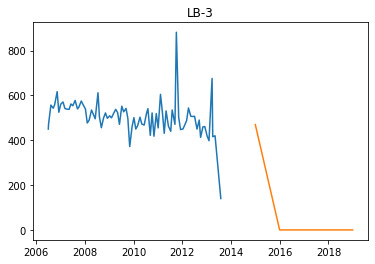

In [86]:
revise(well_name)

### LB-4

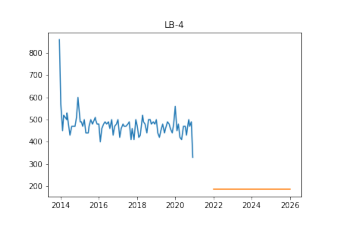

In [139]:
well_name = 'LB-4'
show(well_name)

         Date      y
0  2013-12-11  860.0
1  2014-01-07  570.0
2  2014-02-10  450.0
3  2014-03-03  520.0
4  2014-04-02  510.0
..        ...    ...
82 2020-09-03  480.0
83 2020-09-18  500.0
84 2020-10-06  470.0
85 2020-11-06  490.0
86 2020-12-03  330.0

[87 rows x 2 columns]
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original
Too many training validations for length of data provided, decreasing num_validations to 0
                              y
2021-12-31 00:00:00  712.918798
2022-12-31 00:00:00    0.000000
2023-12-31 00:00:00    0.000000
2024-12-31 00:00:00    0.000000
2025-12-31 00:00:00    0.000000
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"34562f27a32437755c66cf727cf524a3": {"Model": "Ensemble", "ModelParameters": "{\\"model_name\\": \\"Dist\\", \\"model_count\\": 2, \\"model_metric\\": \\"smape\\", \\"models\\": {\\"273c4f16d9dbc0a7217fe2c0ddc3e185\\": {\\"Model\\": \\"ETS\\", \\"ModelParameters\\": \\"{\\\\\\"damped_trend\\\\\\": false, \\\\\\"trend\\\\\\": null, \\\\\\"seasonal\\\\\\": null, \\\\\\"seasonal_periods\\\\\\": null}\\", \\"TransformationParameters\\": \\"{\\\\\\"fillna\\\\\\": \\\\\\"mean\\\\\\", \\\\\\"transformations\\\\\\": {\\\\

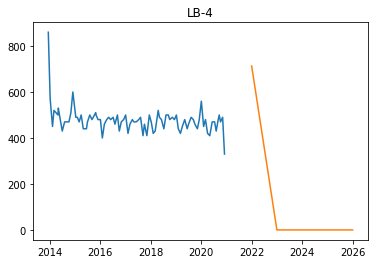

In [140]:
revise(well_name)

### MW-1

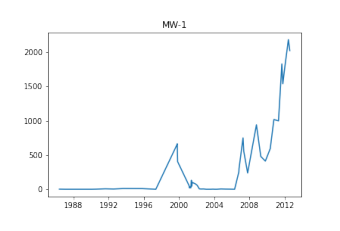

In [89]:
well_name = 'MW-1'
show(well_name)

         Date       y
0  1986-05-22     2.0
1  1987-01-21     0.5
2  1987-10-16     0.5
3  1988-04-12     0.5
4  1988-12-14     0.5
..        ...     ...
50 2011-09-16  1827.0
51 2011-10-26  1538.0
52 2012-01-18  1783.0
53 2012-06-13  2181.0
54 2012-08-10  2021.0

[55 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]                               y
2013-12-31 00:00:00   923.314176
2014-12-31 00:00:00  1036.783542
2015-12-31 00:00:00  1201.078656
2016-12-31 00:00:00  1287.963863
2017-12-31 00:00:00  1399.428725
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"278ded78ac348eb429fa01804ac05868": {"Model": "Ensemble", "ModelParameters": "{\\"model_name\\": \\"BestN\\", \\"model_count\\": 3, \\"model_metric\\": \\"horizontal\\", \\"models\\": {\\"00f62525a7831287636cff498d56d333\\": {\\"Model\\": \\"GLM\\", \\"ModelParameters\\": \\"{\\\\\\"family\\\\\\": \\\\\\"Gamma\\\\\\", \\\\\\"constant\\\\\\": false, \\\\\\"regression_type\\\\\\": \\\\\\"datepart\\\\\\"}\\", \\"TransformationParameters\\": \\"{\\\\\\"fillna\\\\\\": \\\\

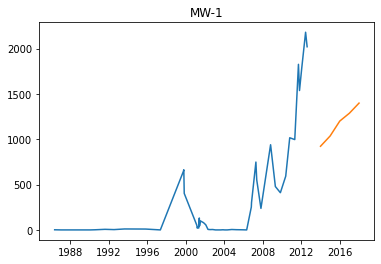

In [90]:
revise(well_name)

### MW-1 Replacement

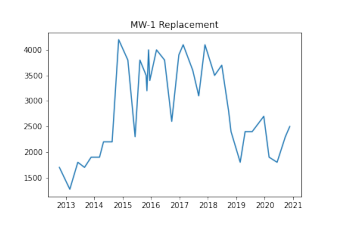

In [91]:
well_name = 'MW-1 Replacement'
show(well_name)

         Date       y
0  2012-10-10  1700.0
1  2013-02-21  1272.0
2  2013-06-04  1800.0
3  2013-08-29  1700.0
4  2013-11-22  1900.0
..        ...     ...
31 2019-12-20  2700.0
32 2020-02-26  1900.0
33 2020-06-08  1800.0
34 2020-09-22  2300.0
35 2020-11-18  2500.0

[36 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Too many training validations for length of data provided, decreasing num_validations to 0
                               y
2021-12-31 00:00:00  1763.490481
2022-12-31 00:00:00  1626.980963
2023-12-31 00:00:00  1490.471444
2024-12-31 00:00:00  1353.961926
2025-12-31 00:00:00  1217.452407
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"82a6fe8db4e76b62bfcef666d1a1ac9e": {"Model": "AverageValueNaive", "ModelParameters": "{\\"method\\": \\"Mean\\"}", "TransformationParameters": "{\\"fillna\\": \\"rolling_mean_24\\", \\"transformations\\": {\\"0\\": \\"DifferencedTransformer\\", \\"1\\": \\"PositiveShift\\", \\"2\\": \\"PowerTransformer\\", \\"3\\": \\"Discretize\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {}, \\"2\\": {}, \\"3\\": {\\"discretization\\": \\"lower\\", \\"n_bins\\": 5}}}"}}, "series": {"y": "82a6fe8db4e76b62bfcef666d1a1ac9e"}}']


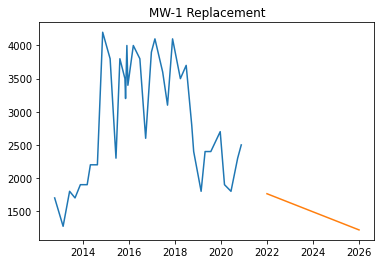

In [92]:
revise(well_name)

### MW-108d

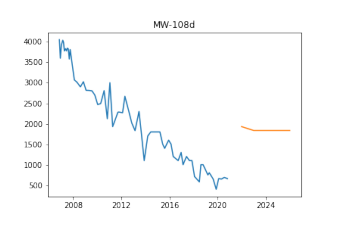

In [93]:
well_name = 'MW-108d'
show(well_name)

         Date       y
0  2006-11-09  4054.0
1  2006-12-08  3600.0
2  2007-01-08  3923.0
3  2007-02-20  4040.0
4  2007-03-14  3993.0
..        ...     ...
59 2019-11-20   400.0
60 2020-02-03   660.0
61 2020-04-29   650.0
62 2020-07-23   690.0
63 2020-10-27   660.0

[64 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using 

Too many training validations for length of data provided, decreasing num_validations to 1
                              y
2021-12-31 00:00:00  504.057599
2022-12-31 00:00:00  255.917835
2023-12-31 00:00:00    3.099091
2024-12-31 00:00:00    0.000000
2025-12-31 00:00:00    0.000000
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"8a9e5ab05df484332fbf30fb0bf64f5e": {"Model": "GLS", "ModelParameters": "{}", "TransformationParameters": "{\\"fillna\\": \\"median\\", \\"transformations\\": {\\"0\\": \\"bkfilter\\", \\"1\\": \\"DifferencedTransformer\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {}}}"}}, "series": {"y": "8a9e5ab05df484332fbf30fb0bf64f5e"}}']


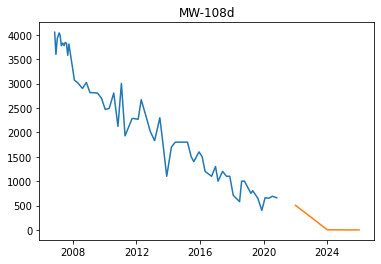

In [94]:
revise(well_name)

### MW-117

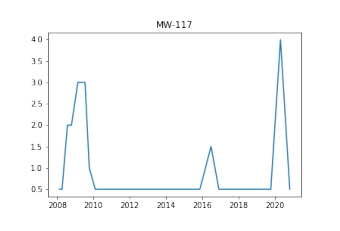

In [95]:
well_name = 'MW-117'
show(well_name)

         Date    y
0  2008-02-14  0.5
1  2008-04-08  0.5
2  2008-07-25  2.0
3  2008-10-14  2.0
4  2009-02-20  3.0
..        ...  ...
29 2018-11-12  0.5
30 2019-04-05  0.5
31 2019-10-10  0.5
32 2020-04-22  4.0
33 2020-10-26  0.5

[34 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Too many training validations for length of data provided, decreasing num_validations to 1
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
SinTrend failed with TypeError('The number of func parameters=4 must not exceed the number of data points=3')
                            y
2021-12-31 00:00:00  0.500271
2022-12-31 00:00:00  0.500023
2023-12-31 00:00:00  2.250289
2024-12-31 00:00:00  0.500084
2025-12-31 00:00:00  0.500143
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"5aff05c08f79260d43f99ac22e769e82": {"Model": "ETS", "ModelParameters": "{\\"damped_trend\\": false, \\"trend\\": null, \\"seasonal\\": \\"additive\\", \\"seasonal_periods\\": 7}", "TransformationParameters": "{\\"fillna\\": \\"rolling_mean_24\\", \\"transformations\\": {\\"0\\": \\"MaxAbsScaler\\", \\"1\\": \\"QuantileTransformer\\", \\"2\\": \\"ClipOu

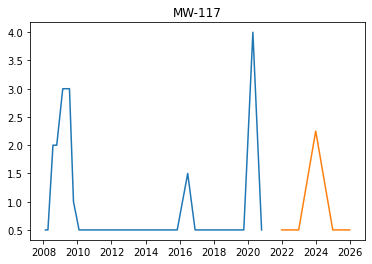

In [96]:
revise(well_name)

### MW-16

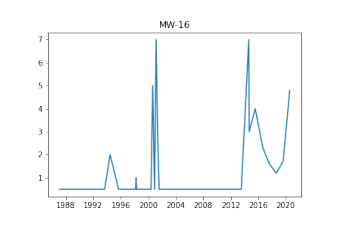

In [97]:
well_name = 'MW-16'
show(well_name)

         Date    y
0  1987-01-20  0.5
1  1987-10-15  0.5
2  1988-04-12  0.5
3  1988-12-08  0.5
4  1989-07-20  0.5
..        ...  ...
64 2016-09-06  2.3
65 2017-08-23  1.6
66 2018-08-21  1.2
67 2019-08-20  1.7
68 2020-08-10  4.8

[69 rows x 2 columns]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                            y
2021-12-31 00:00:00  5.746227
2022-12-31 00:00:00  4.569353
2023-12-31 00:00:00  6.236277
2024-12-31 00:00:00       NaN
2025-12-31 00:00:00       NaN
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"a646726614eb5c5ddba47f7c8c78d33c": {"Model": "RollingRegression", "ModelParameters": "{\\"regression_model\\": {\\"model\\": \\"BayesianRidge\\", \\"model_params\\": {}}, \\"holiday\\": false, \\"mean_rolling_periods\\": 5, \\"macd_periods\\": null, \\"std_rolling_periods\\": 30, \\"max_rolling_periods\\": 60, \\"min_rolling_periods\\": 24, \\"ewm_alpha\\": 0.8, \\"additional_lag_periods\\": 7, \\"abs_energy\\": true, \\"rolling_autocorr_periods\\": null, \\"add_date_part\\": \\"expanded\\", \\"polynomial_degree\\": null, \\"x_transform\\": \\"Nystroem\\", \\"regression_type\\": null}", "TransformationParameters": "{\\"fillna\\": \\"rolling_mean_24\\", \\"t

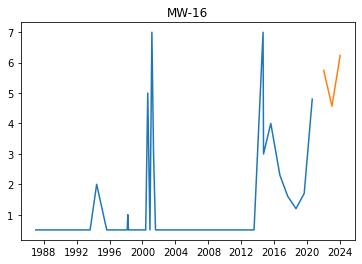

In [98]:
revise(well_name)

### MW-22

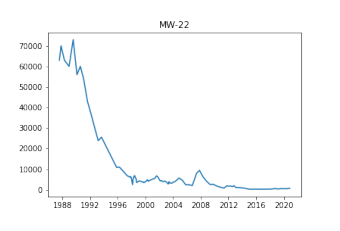

In [99]:
well_name = 'MW-22'
show(well_name)

          Date        y
0   1987-07-23  63000.0
1   1987-10-17  70000.0
2   1988-04-14  63000.0
3   1988-12-15  60000.0
4   1989-07-21  73000.0
..         ...      ...
109 2019-10-30    500.0
110 2020-02-13    550.0
111 2020-06-09    500.0
112 2020-09-08    730.0
113 2020-11-18    660.0

[114 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]FillNA method not known, returning original
FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                              y
2021-12-31 00:00:00  419.884735
2022-12-31 00:00:00  381.764005
2023-12-31 00:00:00  343.643275
2024-12-31 00:00:00  305.418105
2025-12-31 00:00:00  270.000000
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"85f12150969014388f6c5368240252ef": {"Model": "LastValueNaive", "ModelParameters": "{}", "TransformationParameters": "{\\"fillna\\": \\"ffill\\", \\"transformations\\": {\\"0\\": \\"QuantileTransformer\\", \\"1\\": \\"Detrend\\", \\"2\\": \\"PowerTransformer\\"}, \\"transformation_params\\": {\\"0\\": {\\"output_distribution\\": \\"uniform\\", \\"n_quantiles\\": 9}, \\"1\\": {\\"model\\": \\"Linear\\"}, \\"2\\": {}}}"}}, "series": {"y": "85f12150969014388f6c5368240252ef"}}']


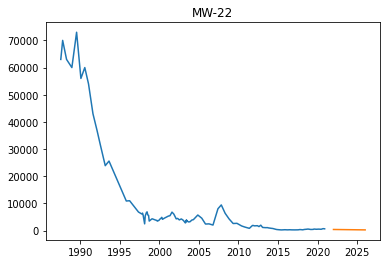

In [100]:
revise(well_name)

### MW-23

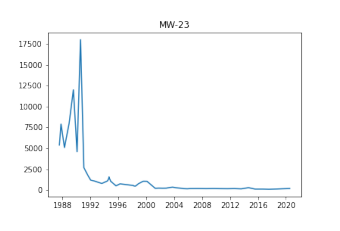

In [101]:
well_name = 'MW-23'
show(well_name)

         Date        y
0  1987-07-23   5400.0
1  1987-10-16   7900.0
2  1988-04-14   5100.0
3  1988-12-14   8000.0
4  1989-07-24  12000.0
..        ...      ...
52 2016-09-20    130.0
53 2017-07-25    110.0
54 2018-09-12    140.0
55 2019-07-08    170.0
56 2020-07-24    200.0

[57 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


             y
2021-12-31 NaN
2022-12-31 NaN
2023-12-31 NaN
2024-12-31 NaN
2025-12-31 NaN
strs =  ['Initiated AutoTS object with best model: ', 'LastValueNaive', '{"fillna": "median", "transformations": {"0": "PowerTransformer", "1": "PctChangeTransformer", "2": "MaxAbsScaler", "3": "MaxAbsScaler", "4": "Discretize"}, "transformation_params": {"0": {}, "1": {}, "2": {}, "3": {}, "4": {"discretization": "lower", "n_bins": 10}}}', '{}']


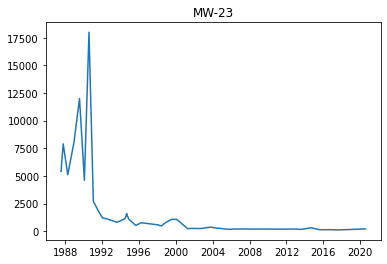

In [102]:
revise(well_name)

### MW-24

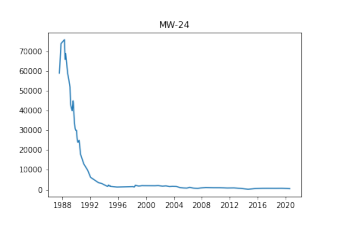

In [103]:
well_name = 'MW-24'
show(well_name)

         Date        y
0  1987-07-23  59000.0
1  1987-10-17  74000.0
2  1988-04-14  76000.0
3  1988-05-16  66000.0
4  1988-06-16  69000.0
..        ...      ...
69 2016-09-27    652.0
70 2017-07-26    660.0
71 2018-09-12    640.0
72 2019-07-08    670.0
73 2020-08-21    470.0

[74 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]                              y
2021-12-31 00:00:00  385.320127
2022-12-31 00:00:00  315.681734
2023-12-31 00:00:00  258.628995
2024-12-31 00:00:00  211.887321
2025-12-31 00:00:00  173.593208
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"3c915e6f6cb6309791dca24794787b54": {"Model": "ETS", "ModelParameters": "{\\"damped_trend\\": false, \\"trend\\": \\"multiplicative\\", \\"seasonal\\": null, \\"seasonal_periods\\": null}", "TransformationParameters": "{\\"fillna\\": \\"rolling_mean_24\\", \\"transformations\\": {\\"0\\": \\"ClipOutliers\\", \\"1\\": \\"ClipOutliers\\"}, \\"transformation_params\\": {\\"0\\": {\\"method\\": \\"clip\\", \\"std_threshold\\": 4, \\"fillna\\": null}, \\"1\\": {\\"method\\": \\"clip\\", \\"std_threshold\\": 2, \\"fillna\\": null}}}"

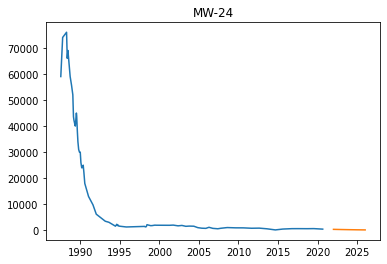

In [104]:
revise(well_name)

### MW-25d

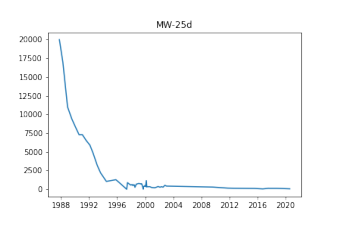

In [105]:
well_name = 'MW-25d'
show(well_name)

         Date        y
0  1987-10-17  20000.0
1  1988-04-14  17000.0
2  1988-12-15  11000.0
3  1989-07-24   9400.0
4  1990-02-02   8300.0
..        ...      ...
58 2017-07-13    130.0
59 2017-09-13    120.0
60 2018-09-21    120.0
61 2019-07-16     99.0
62 2020-07-24     60.0

[63 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using 

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]                             y
2021-12-31 00:00:00  81.818256
2022-12-31 00:00:00  64.980121
2023-12-31 00:00:00  48.141986
2024-12-31 00:00:0

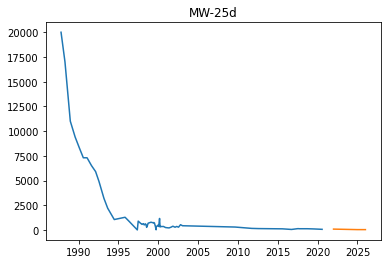

In [106]:
revise(well_name)

### MW-30i

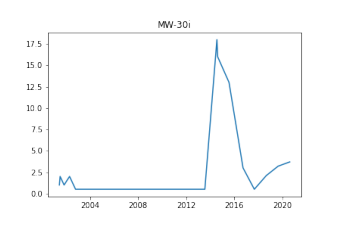

In [107]:
well_name = 'MW-30i'
show(well_name)

         Date    y
0  2001-06-13  1.0
1  2001-07-05  2.0
2  2001-11-03  1.0
3  2002-04-18  2.0
4  2002-10-17  0.5
..        ...  ...
32 2016-09-21  3.0
33 2017-08-30  0.5
34 2018-08-28  2.1
35 2019-08-23  3.2
36 2020-08-11  3.7

[37 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                            y
2021-12-31 00:00:00  1.105481
2022-12-31 00:00:00  1.310289
2023-12-31 00:00:00  1.650260
2024-12-31 00:00:00  2.267570
2025-12-31 00:00:00  3.683814
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"1ba0100c78ddd14f3d67b95abadcfae8": {"Model": "GLM", "ModelParameters": "{\\"family\\": \\"Binomial\\", \\"constant\\": false, \\"regression_type\\": null}", "TransformationParameters": "{\\"fillna\\": \\"median\\", \\"transformations\\": {\\"0\\": \\"PowerTransformer\\", \\"1\\": \\"DifferencedTransformer\\", \\"2\\": \\"DifferencedTransformer\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {}, \\"2\\": {}}}"}}, "series": {"y": "1ba0100c78ddd14f3d67b95abadcfae8"}}']


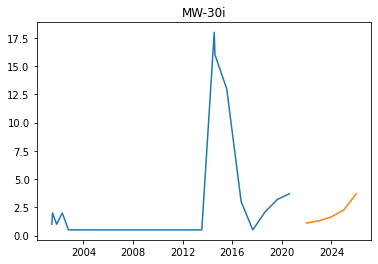

In [108]:
revise(well_name)

### MW-53i

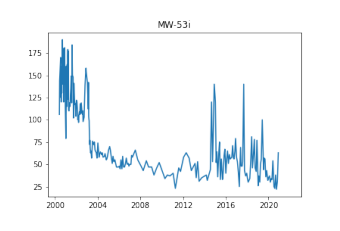

In [135]:
well_name = 'MW-53i'
show(well_name)

          Date      y
0   2000-05-30  106.0
1   2000-06-07  144.0
2   2000-07-12  170.0
3   2000-07-17  125.0
4   2000-07-24  160.0
..         ...    ...
241 2020-08-04   23.0
242 2020-09-01   38.0
243 2020-10-01   22.0
244 2020-11-03   31.0
245 2020-12-03   63.0

[246 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original
FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                             y
2021-12-31 00:00:00  24.673743
2022-12-31 00:00:00  23.931547
2023-12-31 00:00:00  23.223772
2024-12-31 00:00:00  22.546432
2025-12-31 00:00:00  21.901221
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"8cbda150bd52691e26c5ca986dac0f48": {"Model": "UnobservedComponents", "ModelParameters": "{\\"level\\": true, \\"trend\\": false, \\"cycle\\": false, \\"damped_cycle\\": false, \\"irregular\\": false, \\"stochastic_trend\\": false, \\"stochastic_level\\": false, \\"stochastic_cycle\\": false, \\"regression_type\\": null}", "TransformationParameters": "{\\"fillna\\": \\"mean\\", \\"transformations\\": {\\"0\\": \\"PowerTransformer\\", \\"1\\": \\"Detrend\\", \\"2\\": \\"bkfilter\\", \\"3\\": \\"PctChangeTransformer\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {\\"model\\": \\"Linear\\"}, \\"2\\": {}, \\"3\\": {}}}"}}, "series": {"y": "8cbda1

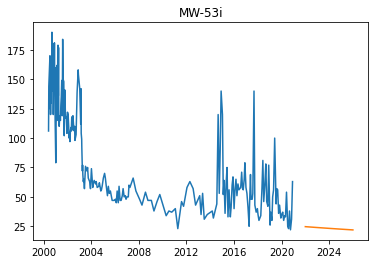

In [136]:
revise(well_name)

### MW-55

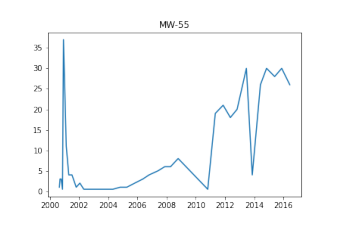

In [112]:
well_name = 'MW-55'
show(well_name)

         Date     y
0  2000-08-28   1.0
1  2000-09-13   3.0
2  2000-10-12   3.0
3  2000-11-14   0.5
4  2000-12-08  37.0
..        ...   ...
35 2014-06-05  26.0
36 2014-11-05  30.0
37 2015-05-27  28.0
38 2015-11-19  30.0
39 2016-06-08  26.0

[40 rows x 2 columns]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Too many training validations for length of data provided, decreasing num_validations to 1
                             y
2017-12-31 00:00:00  28.058824
2018-12-31 00:00:00  30.117647
2019-12-31 00:00:00  32.176471
2020-12-31 00:00:00  34.235294
2021-12-31 00:00:00  36.294118
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"83dda041c335ae449f6cc4b7a22723bb": {"Model": "ETS", "ModelParameters": "{\\"damped_trend\\": false, \\"trend\\": null, \\"seasonal\\": null, \\"seasonal_periods\\": null}", "TransformationParameters": "{\\"fillna\\": \\"rolling_mean\\", \\"transformations\\": {\\"0\\": \\"DifferencedTransformer\\"}, \\"transformation_params\\": {\\"0\\": {}}}"}}, "series": {"y": "83dda041c335ae449f6cc4b7a22723bb"}}']


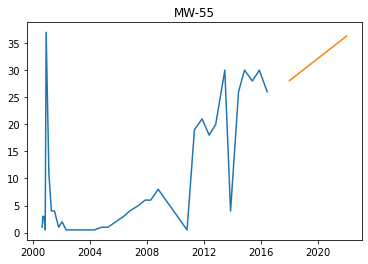

In [113]:
revise(well_name)

### MW-61d

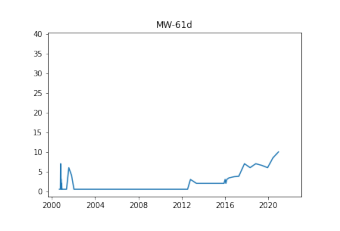

In [114]:
well_name = 'MW-61d'
show(well_name)

         Date     y
0  2000-09-12   0.5
1  2000-10-16   0.5
2  2000-10-23   7.0
3  2000-10-30   4.0
4  2000-11-06   3.0
..        ...   ...
59 2018-11-08   7.0
60 2019-05-22   6.6
61 2019-12-13   6.0
62 2020-06-11   8.5
63 2020-12-14  10.0

[64 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                             y
2021-12-31 00:00:00   8.816946
2022-12-31 00:00:00   9.795848
2023-12-31 00:00:00  11.087213
2024-12-31 00:00:00  13.145186
2025-12-31 00:00:00  17.912803
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"5976fb0d497335689cfff78db5ed53c6": {"Model": "Ensemble", "ModelParameters": "{\\"model_name\\": \\"BestN\\", \\"model_count\\": 3, \\"model_metric\\": \\"horizontal\\", \\"models\\": {\\"a5e72555ad7c638450f6c0f0e1b48abe\\": {\\"Model\\": \\"ETS\\", \\"ModelParameters\\": \\"{\\\\\\"damped_trend\\\\\\": true, \\\\\\"trend\\\\\\": null, \\\\\\"seasonal\\\\\\": null, \\\\\\"seasonal_periods\\\\\\": null}\\", \\"TransformationParameters\\": \\"{\\\\\\"fillna\\\\\\": \\\\\\"zero\\\\\\", \\\\\\"transformations\\\\\\": {\\\\\\"0\\\\\\": \\\\\\"PowerTransformer\\\\\\", \\\\\\"1\\\\\\": \\\\\\"MinMaxScaler\\\\\\", \\\\\\"2\\\\\\": \\\\\\"Detrend\\\\\\", \\\\\\

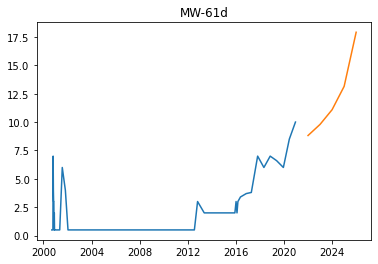

In [115]:
revise(well_name)

### MW-71

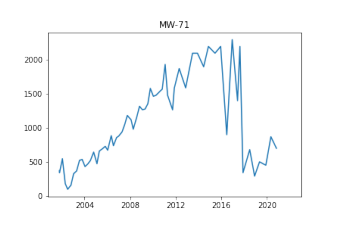

In [116]:
well_name = 'MW-71'
show(well_name)

         Date      y
0  2001-10-17  370.0
1  2001-10-22  340.0
2  2002-01-22  547.0
3  2002-04-23  179.0
4  2002-07-10   96.0
..        ...    ...
56 2018-11-30  290.0
57 2019-05-07  500.0
58 2019-11-25  450.0
59 2020-05-05  870.0
60 2020-10-29  700.0

[61 rows x 2 columns]
FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using 

                              y
2021-12-31 00:00:00  902.012047
2022-12-31 00:00:00  891.384243
2023-12-31 00:00:00  880.991540
2024-12-31 00:00:00  870.799819
2025-12-31 00:00:00  860.858413
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"c6a1b3e775c3705693aba8993599e975": {"Model": "GLM", "ModelParameters": "{\\"family\\": \\"NegativeBinomial\\", \\"constant\\": false, \\"regression_type\\": null}", "TransformationParameters": "{\\"fillna\\": \\"mean\\", \\"transformations\\": {\\"0\\": \\"MinMaxScaler\\", \\"1\\": \\"PowerTransformer\\", \\"2\\": \\"MinMaxScaler\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {}, \\"2\\": {}}}"}}, "series": {"y": "c6a1b3e775c3705693aba8993599e975"}}']


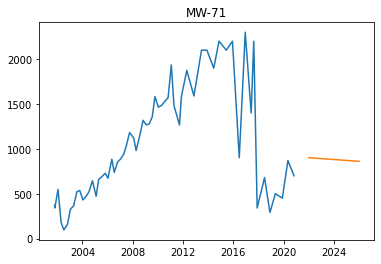

In [117]:
revise(well_name)

### MW-79s

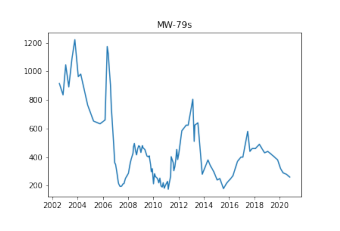

In [137]:
well_name = 'MW-79s'
show(well_name)

          Date       y
0   2002-07-25   915.0
1   2002-11-08   835.0
2   2003-01-24  1046.0
3   2003-04-23   891.0
4   2003-07-23  1088.0
..         ...     ...
108 2019-11-05   380.0
109 2020-01-27   320.0
110 2020-04-10   290.0
111 2020-07-14   280.0
112 2020-10-20   260.0

[113 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear]                         y
2021-12-31 00:00:00  770.0
2022-12-31 00:00:00  339.0
2023-12-31 00:00:00  770.0
2024-12-31 00:00:00  339.0
2025-12-31 00:00:00  339.0
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"de7f43eda2be384ee61d8a036baa5270": {"Model": "RollingRegression", "ModelParameters": "{\\"regression_model\\": {\\"model\\": \\"DecisionTree\\", \\"model_params\\": {\\"max_depth\\": 9, \\"min_samples_split\\": 1.0}}, \\"holiday\\": false, \\"mean_rolling_periods\\": null, \\"macd_periods\\": null, \\"std_rolling_periods\\": 7, \\"max_rolling_periods\\": 24, \\"min_rolling_periods\\": 96, \\"ewm_alpha\\": 0.5, \\"additional_lag_periods\\": 3, \\"abs_energy\\": false, \\"rolling_autocorr_periods\\": null, \\"add_date_part\\": null, \\"polynomial_degree\\": null, \\"x_transform\\": null, \\"regression_type\\": null}", "TransformationParameters": "{\\"fillna\\": \\"m

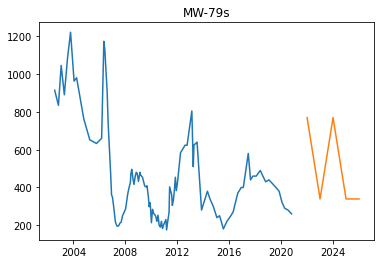

In [138]:
revise(well_name)

### MW-98s

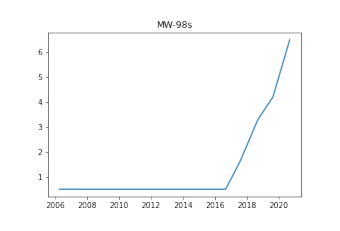

In [120]:
well_name = 'MW-98s'
show(well_name)

         Date    y
0  2006-04-03  0.5
1  2006-08-02  0.5
2  2006-10-27  0.5
3  2007-01-15  0.5
4  2007-04-19  0.5
..        ...  ...
19 2016-09-01  0.5
20 2017-07-24  1.6
21 2018-09-10  3.3
22 2019-08-19  4.2
23 2020-09-08  6.5

[24 rows x 2 columns]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Too many training validations for length of data provided, decreasing num_validations to 1
                             y
2021-12-31 00:00:00   9.508601
2022-12-31 00:00:00  12.361029
2023-12-31 00:00:00  15.057314
2024-12-31 00:00:00  18.147359
2025-12-31 00:00:00  21.381375
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"b2ff177f61be9ba5d71134696ac6d4dd": {"Model": "ETS", "ModelParameters": "{\\"damped_trend\\": false, \\"trend\\": null, \\"seasonal\\": \\"additive\\", \\"seasonal_periods\\": 7}", "TransformationParameters": "{\\"fillna\\": \\"ffill_mean_biased\\", \\"transformations\\": {\\"0\\": \\"DifferencedTransformer\\", \\"1\\": \\"PositiveShift\\", \\"2\\": \\"PositiveShift\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {}, \\"2\\": {}}}"}}, "series": {"y": "b2ff177f61be9ba5d71134696ac6d4dd"}}']


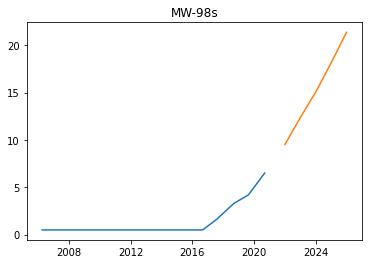

In [121]:
revise(well_name)

### MW-BE-1d

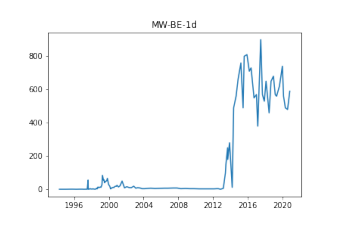

In [122]:
well_name = 'MW-BE-1d'
show(well_name)

          Date      y
0   1994-04-25    0.5
1   1994-07-26    0.5
2   1994-10-18    0.5
3   1995-01-18    0.5
4   1995-09-01    1.0
..         ...    ...
115 2019-12-16  740.0
116 2020-02-03  560.0
117 2020-04-20  490.0
118 2020-07-21  480.0
119 2020-10-22  590.0

[120 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                             y
2021-12-31 00:00:00  10.326850
2022-12-31 00:00:00  13.127537
2023-12-31 00:00:00  16.987279
2024-12-31 00:00:00  22.460252
2025-12-31 00:00:00  30.485773
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"fd4e18a8c30a5859ca304f8f8a9aa317": {"Model": "GLS", "ModelParameters": "{}", "TransformationParameters": "{\\"fillna\\": \\"ffill\\", \\"transformations\\": {\\"0\\": \\"PowerTransformer\\", \\"1\\": \\"DifferencedTransformer\\", \\"2\\": \\"DifferencedTransformer\\", \\"3\\": \\"MaxAbsScaler\\", \\"4\\": \\"CumSumTransformer\\"}, \\"transformation_params\\": {\\"0\\": {}, \\"1\\": {}, \\"2\\": {}, \\"3\\": {}, \\"4\\": {}}}"}}, "series": {"y": "fd4e18a8c30a5859ca304f8f8a9aa317"}}']


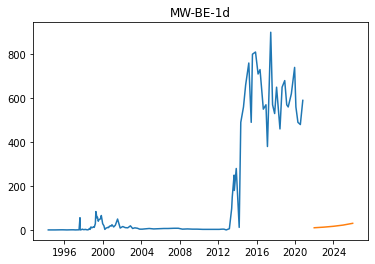

In [123]:
revise(well_name)

### PMW-2

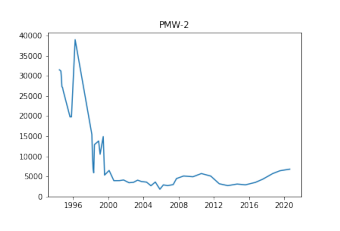

In [124]:
well_name = 'PMW-2'
show(well_name)

         Date        y
0  1994-06-17  31500.0
1  1994-08-18  31200.0
2  1994-09-01  30130.0
3  1994-09-30  27300.0
4  1994-10-27  27100.0
..        ...      ...
42 2016-09-20   3500.0
43 2017-07-25   4300.0
44 2018-09-12   5700.0
45 2019-07-09   6400.0
46 2020-08-21   6800.0

[47 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using 

                               y
2021-12-31 00:00:00  3732.202858
2022-12-31 00:00:00  2148.067570
2023-12-31 00:00:00  2837.282082
2024-12-31 00:00:00  3680.263384
2025-12-31 00:00:00  2558.198556
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"1a6df12f3dcb90865aeeceacff670046": {"Model": "WindowRegression", "ModelParameters": "{\\"window_size\\": 7, \\"regression_model\\": {\\"model\\": \\"MLP\\", \\"model_params\\": {\\"hidden_layer_sizes\\": [72, 36, 72], \\"max_iter\\": 250, \\"activation\\": \\"tanh\\", \\"solver\\": \\"lbfgs\\", \\"early_stopping\\": false, \\"learning_rate_init\\": 0.001}}, \\"input_dim\\": \\"multivariate\\", \\"output_dim\\": \\"1step\\", \\"normalize_window\\": false, \\"shuffle\\": true, \\"max_windows\\": 5000}", "TransformationParameters": "{\\"fillna\\": \\"ffill\\", \\"transformations\\": {\\"0\\": \\"bkfilter\\", \\"1\\": \\"RobustScaler\\", \\"2\

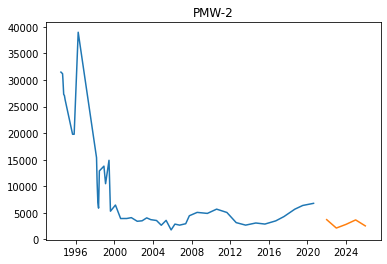

In [125]:
revise(well_name)

### TW-4

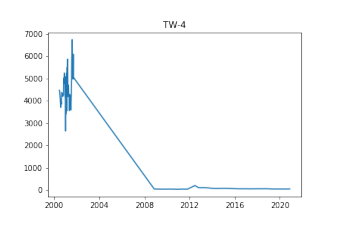

In [126]:
well_name = 'TW-4'
show(well_name)

         Date       y
0  2000-06-21  4470.0
1  2000-06-26  4460.0
2  2000-07-17  4100.0
3  2000-08-01  3720.0
4  2000-08-07  3700.0
..        ...     ...
80 2018-10-30    50.0
81 2019-06-10    39.0
82 2019-11-26    41.0
83 2020-06-09    38.0
84 2020-11-17    43.0

[85 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


FillNA method not known, returning original
FillNA method not known, returning original
FillNA method not known, returning original


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear]FillNA method not known, returning original
FillNA method not known, returning original
                        y
2021-12-31 00:00:00  27.5
2022-12-31 00:00:00  17.5
2023-12-31 00:00:00   7.5
2024-12-31 00:00:00   0.0
2025-12-31 00:00:00   0.0
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"184198e53b711bc9bf78a5979cd88f69": {"Model": "DatepartRegression", "ModelParameters": "{\\"regression_model\\": {\\"model\\": \\"Adaboost\\", \\"model_params\\": {\\"n_estimators\\": 50, \\"loss\\": \\"linear\\", \\"base_estimator\\": \\"DecisionTree\\", \\"learning_rate\\": 1.0}}, \\"datepart_method\\": \\"expanded\\", \\"regression_type\\": null}", "TransformationParameters": "{\\"fillna\\": \\"zero\\", \\"transformations\\": {\\"0\\": \\"Discretize\\", \\"1\\": \\"ClipOutliers\\", \\"2\\": \\"DifferencedTransformer\\"}, \\"transformation_params\\": {\\"0\\": 

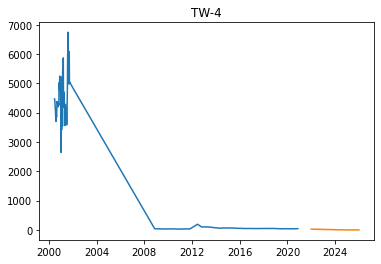

In [127]:
revise(well_name)

### TW-5

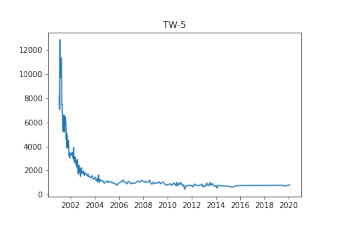

In [128]:
well_name = 'TW-5'
show(well_name)

          Date        y
0   2001-01-22   8230.0
1   2001-01-29   7076.0
2   2001-02-05  12650.0
3   2001-02-12  12871.0
4   2001-02-19  11046.0
..         ...      ...
261 2019-07-18    780.0
262 2019-10-02    710.0
263 2020-01-02    810.0
264 2020-01-03    810.0
265 2020-02-14    800.0

[266 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                              y
2021-12-31 00:00:00  721.070805
2022-12-31 00:00:00  589.571339
2023-12-31 00:00:00  588.573539
2024-12-31 00:00:00  587.932589
2025-12-31 00:00:00  587.535143
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"44ee5755d5b3875c9573a72aa495c909": {"Model": "ETS", "ModelParameters": "{\\"damped_trend\\": false, \\"trend\\": \\"additive\\", \\"seasonal\\": null, \\"seasonal_periods\\": null}", "TransformationParameters": "{\\"fillna\\": \\"ffill\\", \\"transformations\\": {\\"0\\": \\"ClipOutliers\\", \\"1\\": \\"ClipOutliers\\", \\"2\\": \\"SeasonalDifference\\", \\"3\\": \\"QuantileTransformer\\"}, \\"transformation_params\\": {\\"0\\": {\\"method\\": \\"clip\\", \\"std_threshold\\": 3, \\"fillna\\": null}, \\"1\\": {\\"method\\": \\"clip\\", \\"std_threshold\\": 2, \\"fillna\\": null}, \\"2\\": {\\"lag_1\\": 7, \\"method\\": \\"LastValue\\"}, \\"3\\": 

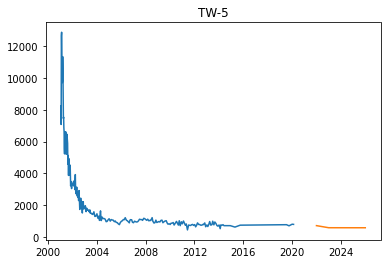

In [129]:
revise(well_name)

### TW-9

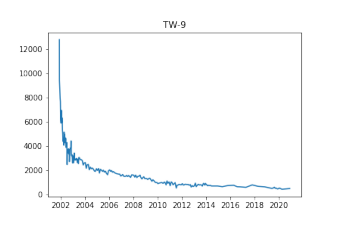

In [131]:
well_name = 'TW-9'
show(well_name)

          Date        y
0   2001-11-14  12761.0
1   2001-11-16   9403.0
2   2001-12-07   7920.0
3   2001-12-14   7661.0
4   2001-12-21   6289.0
..         ...      ...
226 2019-11-25    450.0
227 2020-01-07    520.0
228 2020-01-14    530.0
229 2020-04-02    430.0
230 2020-11-23    490.0

[231 rows x 2 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear]                             y
2021-12-31 00:00:00  48.321834
2022-12-31 00:00:00  48.321834
2023-12-31 00:00:00  48.321834
2024-12-31 00:00:00  48.321834
2025-12-31 00:00:00  48.321834
strs =  ['Initiated AutoTS object with best model: ', 'Ensemble', '{}', '{"model_name": "Horizontal", "model_count": 1, "model_metric": "MAE", "models": {"e47ea5cfc742fbd33314bdb5780fe7eb": {"Model": "SeasonalNaive", "ModelParameters": "{\\"method\\": \\"LastValue\\", \\"lag_1\\": 52, \\"lag_2\\": \\"None\\"}", "TransformationParameters": "{\\"fillna\\": \\"ffill\\", \\"transformations\\": {\\"0\\": \\"RollingMeanTransformer\\", \\"1\\": \\"PowerTransformer\\", \\"2\\": \\"Log\\", \\"3\\": \\"Detrend\\"}, \\"transformation_params\\": {\\"0\\": {\\"fixed\\": true, \\"window\\": 3}, \\"1\\": {}, \\"2\\": {}, \\"3\\": {\\"model\\": \\"Linear\\"}}}"}}, "series": {"y": "e47ea5cfc742fbd33314bdb5780fe7eb"}}']


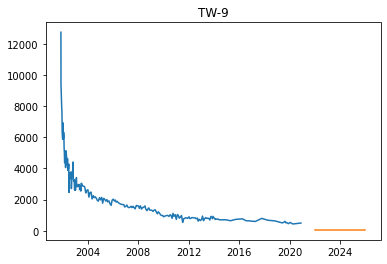

In [132]:
revise(well_name)